     Final Project
                                         ---California population
                             
                             Author : Rui Xu, Gang Xiao, Yuxin Xiao, Ruotong Wu
                             
<div style="page-break-after: always; visibility: hidden"> 
\pagebreak 

# Background and Motivation

As a result of the pandemic, a severe economic loss can be observed in recent days. We are curious whether population growth/decay would affect the economy, so we had some research, and from the article “Urban land expansion: the role of population and economic growth for 300+ cities” (Mahtta et al., 2022), we noticed that the population in a region would affect the urban land expansion, and the economy would consequently grow. If we can create a population growth model for a region, then the government can establish policies such as the establishment or removal of population migration incentive schemes, and family planning to control the population change rate based on this model. The size of the population can be a determining factor of the local economy. More population means more labour force, though it would lead to different issues like the housing crisis, shortage of supply, etc.(How does population affect demand, 2021)  Meanwhile, the composition of the population would affect the region significantly. The ageing tendency of the population is a serious problem in the world. People who are 65 and over in California are 14.8% of the whole population, and this is expected to have an overall 166% increase in the next fifty years. (California, Facts about California's elderly) With the ageing of the population, there would be a decrease in the labour force, and the government needs to put more attention on the pension plan and local health care, so the projection of population in the future is crucial to a region. We choose the population of California to do the analysis, and we want to use this model to make a prediction of the population size in California in the future.

# Research Question

Base on existing data, what would be the projection of population in future, and how would the change in population have impacts on the economy? To be more specific, if we divide the whole population into three age groups(children, adults, seniors), how would the proportion of each sub-population reflect the variation in labour force in this region?

# Base Model Construction 

## Real-world mechanisms and assumptions

In the real world, the population change is determined by three demographic factors: the number of new births, which will add population to the region; the number of deaths, which will move the population out of the region, and the number of net migrants which explains the rest of change in population size. Many other factors are closely rated to population growth. For example, there could be wars, pandemics, medical improvement, economic growth, environmental issue(pollution, carbon emission), change in people’s perspective on giving birth, and changes in government policies(abortion, family planning, taxation, public welfare), but all of which impact the population through changing the fertility rate, death rate and net migration rate. Therefore, to simplify our model construction but still capture the factors that dominate population evolution, our base model will only include birth rate, death rate and net migration rate to project population growth. To uncover the factors that drive the population change, we will assume all of those three parameters are constant. However, all of these three rates are dynamic and change over time. For example, the United States experienced a time when there were high birth rates between mid-1946 and mid-1964. There was also a decrease in deaths from 1955 to 2020 which is not true in our model with a constant death rate. The most important factor that is also not considered in our model is migration. To simplify our model, we only consider the transition between California and the rest of the U.S and do not include immigrants from other countries, which had a large contribution to the population in America.


In [101]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy.linalg as linalg

In [102]:
pop_cal = 12988
birth_cal = 1708
death_cal = 614
pop_US = 152082
birth_US = 19499
death_US = 7417
nm_cal = 1124
nm_US = -1124
r_cal = birth_cal/pop_cal
d_cal = death_cal/pop_cal
r_US = birth_US/pop_US
d_US = death_US/pop_US
nmr_cal = nm_cal/pop_cal
nmr_US = nm_US/pop_US
print(r_cal)
print(d_cal)
print(r_US)
print(d_US)
print(nmr_cal)
print(nmr_US)

0.1315060055435787
0.04727440714505698
0.1282137268052761
0.048769742638839576
0.08654142285186325
-0.007390749727120895




### Model I

Parameters

**Birth rate**

b1 : number of individuals born in California’s population per capita in the time period of 5 years

b2 : number of individuals born in the population of the rest of US per capita in the time period of 5 years

**Mortality rate**

d1 : number of deaths in California’s population per capita in the time period of 5 years

d2 : number of deaths in the population of the rest of US per capita in the time period of 5 years

**Net Migration rate**

nm1: the difference between the number of people coming into California and the number of people leaving California per capita

nm2 : the difference between the number of people coming into California and the number of people leaving California per capita  


**Growth Matrix G**

We define our growth matrix to be G = I + B − D + M, and we need I here because the population in the next year should include the population in the previous year, and the matrix B - D + M solely measures the change rate of population. In another word, we assume that the population in the next year is only based on the population size in the current year.

The constructed model is as below



\begin{equation}
\begin{bmatrix} P1 \\ P2 \end{bmatrix}_{T+1} = \begin{bmatrix} 1+b1-d1+nm1 & 0 \\ 0 & 1+b2-d2+nm2 \end{bmatrix} \begin{bmatrix} P1 \\ P2 \end{bmatrix}_{T}
\end{equation}


With calculated parameters, we have 


\begin{equation}
\begin{bmatrix} P1 \\ P2 \end{bmatrix}_{T+1} = \begin{bmatrix} 1.17077302 & 0 \\ 0 & 1.07205323 \end{bmatrix} \begin{bmatrix} P1 \\ P2 \end{bmatrix}_{T}
\end{equation}



### Model II

Parameters

t11 : number of people who stay in California in the 5 year period per capita

t12 : number of people who moves from the rest of US to California per capita

t21 : number of people who moves from California to the rest of US per capita

t22 : number of people who stayed in the rest of US per capita


**Growth Matrix T**

For our transition matrix T, we do not need I as in the previous model since the transition rate t11 and t22 is the proportion of the population who stay in this region, which includes the information of the population in the current year.


The constructed model is as below


\begin{equation}
\begin{bmatrix} P1 \\ P2 \end{bmatrix}_{T+1} = \begin{bmatrix} t11 & t12 \\ t21 & t22 \end{bmatrix} \begin{bmatrix} P1 \\ P2 \end{bmatrix}_{T}
\end{equation}


With calculated parameters, we have


\begin{equation}
\begin{bmatrix} P1 \\ P2 \end{bmatrix}_{T+1} = \begin{bmatrix} 0.93732676 & 0.01274313 \\ 0.06267324 & 0.98725687 \end{bmatrix} \begin{bmatrix} P1 \\ P2 \end{bmatrix}_{T}
\end{equation}


# Base model analysis

In [106]:
def pop_base_mod1(pop_cal, pop_US, r1, d1,nmr1,r2,d2,nmr2,T):
    N = np.arange(T + 1)
    x = np.zeros((3, T + 1))
    x[0] = N
    x[(1,2),0] = np.array([[pop_cal, pop_US]])

    G = np.array([[1+r1-d1+nmr1, 0], [0, 1+r2-d2+nmr2]])
    
    eig, P = linalg.eig(G)

    P_inv = linalg.inv(P)
    D = np.zeros((len(eig),len(eig)))
    np.fill_diagonal(D, eig)
    
    for i in N[1:T+1]:
        x[(1,2),i] = G.dot(x[(1,2),i-1])
        
    
    df = pd.DataFrame({
        'N': x[0],
        'California': x[1],
        'Rest of U.S.': x[2]
    })
    
    return x,df

       N     California   Rest of U.S.
0    0.0   12988.000000  152082.000000
1    1.0   15206.000000  163040.000000
2    2.0   17802.774561  174787.559343
3    3.0   20843.008160  187381.568333
4    4.0   24402.431635  200883.016406
5    5.0   28569.708611  215357.287482
6    6.0   33448.644067  230874.476605
7    7.0   39160.770071  247509.729394
8    8.0   45848.373090  265343.605952
9    9.0   53678.038282  284462.470999
10  10.0   62844.799055  304958.912111
11  11.0   73576.995259  326932.188100
12  12.0   86141.961034  350488.709695
13  13.0  100852.683976  375742.554862


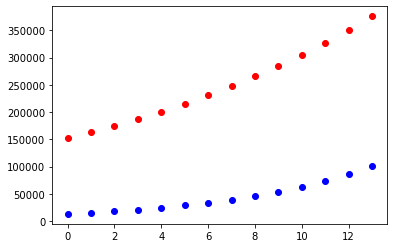

In [107]:
x,df = pop_base_mod1(pop_cal = 12988, pop_US = 152082, r1 = r_cal, d1 = d_cal,nmr1 = nmr_cal, r2 = r_US, d2 = d_US, nmr2 = nmr_US, T = 13)
plt.scatter(x[0,:], x[1,:], c='b')
plt.scatter(x[0,:], x[2,:], c='r')
print(df)   
    

* Interpretation of Simulation Result Model I

1. Using the 1955 data and the computed rate, we can see that after 5 years, California will have a population of size 15206 and the rest of the U.S will have a population of size 163040, which verifies the provided data in 1960

2. The predicted population in California in 2020 is approximately 100852684, while the data found on US census data is 39538223. The predicted population in the rest of the U.S. is 375742555, while the data found on US census data is 291911058. We can see that there are discrepancies between our simulated result and the actual value, which means the population grows much slower than our prediction. Even though we can see an increase in population in these two regions, which means the model accurately describes the pattern of population growth to some extent, the performance is still not very satisfying due to our assumptions stated above, such as constant birth and death rate, as well as no immigrants from other countries.

In [108]:
G = np.array([[1+r_cal-d_cal+nmr_cal, 0], [0, 1+r_US-d_US+nmr_US]])
eig, P = linalg.eig(G)
growth_rate = eig-1
print(eig) # eigenvalue of growth matrix G
print(growth_rate[0]) # long-term growth rate

[1.17077302 1.07205323]
0.17077302125038485


**Mathematical Analysis** 

In order to have some insights into the population distribution between California and the rest of the US in the long run, we have performed a mathematical analysis on the growth matrix G by looking at its dominant eigenvalues. By calculation, the largest eigenvalue of G is 1.17077302, which means the population in these two regions will have geometric growth in the long run with a growth rate of around 17%. This result is not realistic because the population in America will go to infinity, which could be explained by no limit capacity in our model.

In [109]:
t11 = 12174/12988
t12 = 1938/152082
t21 = 814/12988
t22 = 150144/152082

In [110]:
def pop_base_mod2(pop_cal, pop_US, a, b,c,d,t):
    N = np.arange(t + 1)
    N = N.astype(int)
    x = np.zeros((3, t + 1))
    x[0] = N
    x[(1,2),0] = np.array([[pop_cal, pop_US]])

    T = np.array([[a, b], [c, d]])
    
    
    for i in N[1:t+1]:
        x[(1,2),i] = T.dot(x[(1,2),i-1])
        
    df = pd.DataFrame({
        'N': x[0],
        'California': x[1],
        'Rest of U.S.': x[2]
    })
    
    return x,df

       N    California   Rest of U.S.
0    0.0  12988.000000  152082.000000
1    1.0  14112.000000  150958.000000
2    2.0  15151.232009  149918.767991
3    3.0  16112.088920  148957.911080
4    4.0  17000.481498  148069.518502
5    5.0  17821.874740  147248.125260
6    6.0  18581.321492  146488.678508
7    7.0  19283.493532  145786.506468
8    8.0  19932.710311  145137.289689
9    9.0  20532.965522  144537.034478
10  10.0  21087.951669  143982.048331
11  11.0  21601.082780  143468.917220
12  12.0  22075.515409  142994.484591
13  13.0  22514.168055  142555.831945


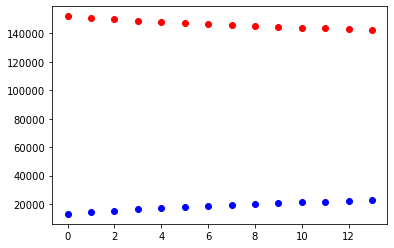

In [111]:
x,df = pop_base_mod2(pop_cal = 12988, pop_US = 152082, a = t11, b = t12,c = t21,d = t22,t = 13)
plt.scatter(x[0,:], x[1,:], c='b')
plt.scatter(x[0,:], x[2,:], c='r')
print(df)  

**Interpretation of Simulation Result Model II**

In our second model, we will only look at the transition between California and the rest of the U.S and we will omit the birth and death so that we could have a better understanding of the population distribution within America.
The predicted value of population in California in 2020 using this model would be 22514168 while the predicted value of population in the rest of the U.S would be 142555832, both of which are less than the real data. We can see from the plot that, if we assume the whole population is constant over time, that is no new births, immigrants from outside of the U.S. are added to the whole population, and no deaths and emigrates are moved out of the whole population, then there is an increase in the population of California and a decrease of population in the rest of population. 

Therefore, we draw a conclusion that Americans' preference for the state for immigration. This result makes sense in terms of reality since California has the largest economy in the world with some of the most famous employers and highest-rated colleges. Consequently, the more immigrants to California, potentially the more labour force we might see in California's population. However, this may not be the case due to the fact that America is graying. Therefore, we are particularly interested in the age structure of California, which will be explored through our extended model to see if the labour force in California is increasing or decreasing just like the rest of the U.S despite immigrants within the country.


In [112]:
T = np.array([[t11, t12], [t21, t22]])
eig, M = linalg.eig(T)
M_inv = linalg.inv(M)
init_vals = np.array([[12988, 152082]])
c =  M_inv.dot(init_vals.transpose())
a = M[:,1] * c[1]
normalized = a / sum(a)
print(eig) # eigenvalue of transition matrix
print(a) # the 'fixed point' that the population will reach to in the long run
print(normalized) # the proportion of California's population



[0.92458364 1.        ]
[ 27891.92756185 137178.07243815]
[0.1689703 0.8310297]


**Mathematical Analysis** 

From our calculation, the dominant eigenvalue of our transition matrix is 1, which means that in the long run, the population will reach a 'fixed point' and stabilize at this point. Therefore, we predict that in the future, California's population will be around 16.897% of the whole population in America. This is higher than 202 Census data which is 11.91%, but in reality, California still ranks at the top among all the states.

**Comparison Between Two Base Models** 

The differences between our two bases are the exclusion of birth and death, and we have an overestimate with the first model and an underestimate with the second one. If we include the birth rate and death rate, then there would be an overestimation, but if we omit these two rates, we have an underestimation. Therefore, we are wondering if we could reach a balance to have a better prediction for the population by breaking one of the assumptions in the base model - the constant birth rate. By adding noise to the birth rate, we hope to see a prediction closer to the real data. If this is true, then we are confident to say that our assumption for this parameter is closer to the real-world mechanism, which is essential to our primary interest in the proportion of the labour force since new births will fall into the working force in the future.


# Model extentions

## Extension 1(Combined Model)

In the real world, births and migration increase urban populations, while deaths and migration reduce them. So in the base model, we assumed the increase in population comes from births(B) and immigration(I), and the decrease in population comes from deaths(D) and emigration(E).

As far as we are concerned, birth and death are the most important factors in the population change for a city. Another significant factor is migration. However, in most of the time, migration is not directly related to births and deaths. For example, about 65% of the immigrants to the US were between 15 to 64, who have a lower mortality rate than those who are over 65 years old. Meanwhile, migration is mainly controlled by the government, which is not naturally changing. Therefore, we would construct a combined model with births and deaths in the first model, immigration and emigration in the second model.
            
Combining the two models makes it more accurate to calculate the population of a region. Separating immigration helps governments control population growth. When the first model predicts that the population is lower or higher than the desired population size, the government can change the immigration policy to introduce more immigrants or slow down the immigration to balance the population. When the net migration is high or low in the second model, the government may change fertility policies to affect the birth rates and make improvements to local medical care to affect the death rates in order to balance the population. Through the two models, population growth can be balanced so that cities can avoid overpopulation and population scarcity.

We can infer the impact of population on the economy from the results of the two models. When the birth rate is high and the death rate is low in the first model while the predicted net migration rate is high in the second model, the result is that the population is too large and the surplus of the labour force may cause an unstable social environment and negatively affect the economy. On the other hand, when the birth rate is low and the death rate is high while the net migration rate is low, it may result in labour scarcity. In these cases, urban economies are directly affected by the population, thus the intervention of the government is crucial, and this combined model would help the government manage the population size.

With the development of medical treatment and economic progress, human life expectancy has greatly increased, and the number of newly born people is also increasing due to the absence of famine and disaster, which leads to the continuous increase of population. On the other hand, California's superior welfare benefits attracted more and more immigrants, resulting in a surge in the urban population. To sum up, California's population will continue to grow in the future. The continuous growth of population has promoted the city's economy, but it has also led to some bad consequences, such as the labour surplus, an ageing population, and the growth of a bubble economy. Forecasting and controlling the population through models has become a necessary means for local governments.

Construct a model with births and deaths as in the first model explored above, and the immigration and emigration as in the second model. This model should have the form.

From the above information, we can summarize all the variables, as shown below

### Processes

1.     Births 
2.     Deaths
3.     Migration
4.     Immigration
5.     Emigration

### Modelling assumption

1.     Bin the population into 2 group.   
### Parameters

1.     B = births rate
2.     death rate= deate rate 
3.     T= net migration rate
4.     I= immigration rate
5.     E= emigration rate

Therefore:


We estimate the future urban population by births, deaths, net migration. The net migration is calculated separately.

$$P(t+1)= (B-D+T)*P(t)$$

Because policies differ from year to year, the number of immigrants varies, and immigration is not directly related to the other variables, so calculating net immigration alone can be a more accurate population forecast.

$$T =E+I$$

This combined model also has limitations. It cannot specifically find out the factors that affect the economy. To find out these factors that affect the economy more accurately, we can subdivide the base model, to be more specific, divide the population into three parts according to age and calculate their population growth rate respectively.

## Extension 2(Population distribution by Age group)

In the real world, economic development is closely related to population. In recent years, California's economy has developed rapidly and people's living standards have been improving. While we enjoy the benefits of economic growth, we should also analyze the causes of economic growth. California's economic growth has been fueled by a growing population of urban workers, most of whom are adults. But with the improvement of medical care and the increasing pressure of child-rearing, the urban population is getting older and having fewer children. To sum up, we have made some changes to the basic model in order to better study the impact of population on economy

Adults are responsible for the main part of a city's economy, whereas children and elderly people have less impact on the economy. Thus, we can divide the whole population into three groups by age: $P_1$(0 to 24), $P_2$(25 to 64), and $P_3$(over 64). This helps us to pinpoint socioeconomic factors. On the other hand, the birth rate given from elderly people and children is $b_3$ and $b_1$ which are very low, while the elderly are the main factor in the death rate. Dividing the population gives a more realistic figure since each group has different birth, death, and migration rates, and thus, we have to count the population at each stage separately.

Most people between the ages of 0 and 24 are still students. Their mental maturity and ability are not enough to qualify for the labour force, so there is a little impact on the economy. The birth rate $b_3$ from this group is relatively low because they cannot have children legally or raise a child financially. Most of the people at this age are at their healthiest stage and live under the care of family, so the death rate is also low, which means the survival rate $s_{12}$ is high.

Adults are the main part of the urban labour force, they have a mature mind and enough ability to create economic value, and also a direct factor in affecting the economy. Most adults get married and have children at this stage, so they are the main childbearing force which means a high birth rate $b_2$ is given, but they also have a certain death rate (certain survival rate $s_{23}$) due to personal health reasons, accidents, etc.

For the third group, this group would have a high mortality rate and an extremely low birth rate $b_3$ from this group due to physiological reasons. The majority of the elderly do not go to work at this age, thus the economic productivity of this group is low. 

Meanwhile, the age to receive a full retirement benefit in California is 66 years old, and the demand for medical resources for this group is high, so the government needs to pay attention to the amount of population in this group. 

It is more accurate to obtain the distribution of the population by age through different birth rates and death rates. Such information can obtain the population proportion of different ages in a city, which will help the government to have a more detailed understanding of the population distribution of a city, so as to issue different laws to prevent social problems such as population ageing and the low fertility. Appropriate measures need to be taken to adjust the proportion of each group for the population. When the elderly population becomes high, there might be labour scarcity, and the government may need to encourage childbirth and immigration. When the adult population is high, there might be a surplus in the labour force, hence the government may need to encourage childbirth and slow down immigration. When the children population is high/low, there would be a surplus/scarcity of labour in future, so the government also needs to put it into consideration.


### Processes

1.     Births 
2.     Deaths
3.     Migration
4.     Ageing

### Modelling assumption

1.     Bin the population into 3 age group (0-24,25-64,64 over)
2.     Birth rates are the same for different ages that are in the same age group
3.     Survival rates are the same for different ages that are in the same age group
4.   Track the model of migration alone
5.   Assume the birth rate and survival rate are constant 
6.   Time scale N=5 years

### Parameters

1.     bi = births rate in age group i
2.     sij= survival rate in age group i to age group j 
3.   di= death rate in age group i 



In [113]:
import schemdraw
import schemdraw.elements as elm
from schemdraw import flow

In [114]:
pip install schemdraw[svgmath]

Note: you may need to restart the kernel to use updated packages.


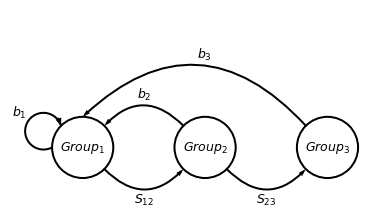

In [115]:
with schemdraw.Drawing() as d:
    d += (p1 := flow.Circle(r=1).label('$Group_1$'))
    d += (p2 := flow.Circle(r=1).at((4, 0)).label('$Group_2$'))
    d += (p3 := flow.Circle(r=1).at((8, 0)).label('$Group_3$'))
    
    d += elm.ArcLoop(arrow='->').at(p1.W).to(p1.NW).label('$b_1$')
    d += elm.Arc2(arrow='<-').at(p1.NE).to(p2.NW).label('$b_2$')
    d += elm.Arc2(arrow='<-').at(p2.SW).to(p1.SE).label('$S_{12}$')
    d += elm.Arc2(arrow='<-').at(p3.SW).to(p2.SE).label('$S_{23}$')
    d += elm.Arc2(arrow='<-').at(p1.N).to(p3.NW).label('$b_3$')   


\begin{align}
P_1(N+1)&=b_1P_1(N)+b_2P_2(N)+b_3P_3(N)\\
P_2(N+1)&=S_{12}P_1(N)\\
P_3(N+1)&=S_{23}P_2(N)\\
T&=E+I\\
P_{total}(N+1)&=P_1(N+1)+P_2(N+1)+P_3(N+1)+T\\
P_{total}(N+1)&=b_1P_1(N)+b_2P_2(N)+b_3P_3(N)+S_{12}P_1(N)+S_{23}P_2(N)+(E+I)\\
\end{align}
Suppose $D_i$ is death from each group then,
$$D_i(N+1)=(1-S_{ij})P_i(N)$$

# Extended model analyses

In the real world, California's population statistics in recent years show that the population is growing, with the proportion of the elderly increasing year by year and the proportion of adults and children decreasing. The consequence of this situation is the shortage of labour force brought by the ageing population and the small number of children, which directly leads to the decline of the urban economy. This is the result of the analysis of the model, and the following is the analysis process.

From the above model extension, we divided the population into three parts according to age. In addition, we have established the model of migration, because it is more convenient for us to find the corresponding data and determine the migration population more accurately. The reasons will show below.

In the model we have the equation:


$$P_1(N+1)=b_1P_1(N)+b_2P_2(N)+b_3P_3(N)$$

It's well known that elderly have very low fertility because of their declining physical function and that means very low birth rate $b_3$. And the number of the elderly poppulaiton $P_3$ is increasing due to the improvement of the medical level. And then the increasing in population of adults $P_2$ and children $P_1$ passing background checks has been falling. To sum up, the increase in future births $P_1$(N+1) will be lower.

We obtain the first group (0 - 24 years old) of the population by calculating the birth-giving from different ages, so we’re obtaining information about the number of young people in the population, which is the future workforce. So through the data, we can get the number of teenagers, so as to judge whether the amount of this population has met the demand of the labour force in the city.

$$P_2(N+1)=S_{12}P_1(N)$$

We can get survival rates by looking at the death rates at each age group and that will help us do the maths. On the other hand, it benefits us to calculate the number of deaths in each age group.


$$P_3(N+1)=S_{23}P_2(N)$$

The survoval rate $s_{23}$ rate is rising because of improved medical care, therefore the future elderly population $P_3(N+1)$ is increasing. By obtaining the information about the elderly population, we compared it with the total population to get the proportion of the elderly. If the proportion of the elderly is higher than the standard, the government can take measures in advance to prevent the ageing of the population. Because the elderly do not have the ability to work and give birth is extremely limited, so it will lead to a lack of labour force and affect the economy.

We found population data for 2015 and 2020.

\begin{align}
P_{total}(N+1)&=b_1P_1(N)+b_2P_2(N)+b_3P_3(N)+S_{12}P_1(N)+S_{23}P_2(N)+(E+I)\\
\end{align}

To sum up, the future children population $P_1(N+1)$ is decreasing since the low birth rate $b_3$ , and the increase in the population of adults $P_2$ and children $P_1$ are falling. The future elderly population $P_3(N+1)$ are increasing since high surivial rate $s_{23}$. So as the population grows, the proportion of older people increases, while the proportion of adults and children decreases.

In [3]:
pip install tabulate

Note: you may need to restart the kernel to use updated packages.


In [117]:
from tabulate import tabulate
table1 = [['','Group 1', 'Group 2', 'Group 3', 'Total'], 
[2010, 13296373, 19832512, 4257827, 37386712],
[2015, 13074369, 20903333, 5167115, 39144817],
[2020, 12731407, 21073872, 5653965, 39459244]]
print(tabulate(table1, tablefmt='fancy_grid'))

table2 = [['Birth rate', 'Group 1', 'Group 2', 'Group 3'],
          [2010, '15.029%', '54.941%', '4.226%']
]
print(tabulate(table2, tablefmt='fancy_grid'))

╒══════╤══════════╤══════════╤═════════╤══════════╕
│      │ Group 1  │ Group 2  │ Group 3 │ Total    │
├──────┼──────────┼──────────┼─────────┼──────────┤
│ 2010 │ 13296373 │ 19832512 │ 4257827 │ 37386712 │
├──────┼──────────┼──────────┼─────────┼──────────┤
│ 2015 │ 13074369 │ 20903333 │ 5167115 │ 39144817 │
├──────┼──────────┼──────────┼─────────┼──────────┤
│ 2020 │ 12731407 │ 21073872 │ 5653965 │ 39459244 │
╘══════╧══════════╧══════════╧═════════╧══════════╛
╒════════════╤═════════╤═════════╤═════════╕
│ Birth rate │ Group 1 │ Group 2 │ Group 3 │
├────────────┼─────────┼─────────┼─────────┤
│ 2010       │ 15.029% │ 54.941% │ 4.226%  │
╘════════════╧═════════╧═════════╧═════════╛


Then, we can do a simulation, demonstrating the accuracy of the model.


$$P_1(N+1)=15.029\% * 13296373+54.941\% * 19832512+4.226\% * 4257827$$

$$P_1(N+1)=13074428$$

$$S_{12}=\frac{P_2(N+1)}{P_1(N)}=\frac{20903333}{13296373}=1.57211$$

$$S_{23}=\frac{P_3(N+1)}{P_2(N)}=\frac{5167115}{19832512}=0.261$$

Therefore: Simulate 2020

$$P_1(N+1)=15.029\% * 13074369+54.941\% * 20903333+4.226\% * 5167115P_1(N+1)=13667809$$

$$P_2(N+1)=1.57211*13074369=20554346$$

$$P_3(N+1)=0.261*20903333=5455769.913$$


The data we got from the above calculations are very realistic, so our model is very successful.


# Stochastic element

If we go with the base model, parameters are fixed then we can predict the population in 2020. 

However, the base model simulated population result for 2020 is 100.852 million which is way far from the real population(39.538million).

In [118]:
I = 1
B = 0.1315060
D = 0.0472744
M = 0.086541422
def P(t):
    if t == 1955:
        return 12988
    else:
        return P(t - 5) * (I + B - D + M)

print('P(1960)=',P(1960))
print('P(2020)=',P(2020))

P(1960)= 15206.000009735999
P(2020)= 100852.68481575891


Parameters like birth rate, death rate, and migration in the model are random in nature. To explore the stochasticity in the base model, I assume birth rate is  randomly changing during the years and the other parameters are fixed. 

From the research it shows that  birth rate have a downward trend as years goes by ((Exploring Recent Trends in California Births,2021). 

Since the birth rate has a downward trend I use $e^{-x}$ to illustrate that as the year goes by the rate is going down. To show the variation, I add a Noise using the normal distribution to figure out the stochasticity. Therefore, I can conclude that the birth rate form is as follow. 


\begin{equation}
b_1 =C_1*e^{-x}+N_1
\end{equation}

\begin{equation}
b_2 =C_2*e^{-x}+N_2
\end{equation}

$N_1$: Noise for California birth rate

$N_2$: Noise for the rest of U.S. birth rate

$x$: Time per 5 years

And let the birth rate per 5 years goes with random distribution. We are trying to figure out what happen to the population in 2020 both in California and the rest of U.S.

In [22]:
import numpy as np
import math

In [23]:
from numpy import random

In [24]:
list_2020 = []
for i in range(30):
    ls = random.normal(0,0.0003,size=13)
    #By doing the normal distribution creat the proper Noises
    #randomly pick 13 Noises to fit per capita birth rate in California
    my_dict={}
    for i in range(1,14):
        my_dict[i] = ls[i-1]
    print(my_dict)
    print()
    list_2020.append(my_dict)
    

# California use the data from description
#apply the new parameter b_1 to the base model

I = 1
D = 0.0472744
M = 0.086541422
def P(t, index):
    if t == 1955:
        return 12988
    else:
        x = (t-1955)/5
        n = list_2020[index][x]
        b1 = 0.0485*math.exp(-x)+n
        return P(t - 5, index) * (I + b1 - D + M)
    
L = []
for index in range(30):
    L.append(P(2020, index))
    
# print('L',L) to check the list of California population in 2020


{1: 9.477670668357391e-05, 2: 8.905946899942109e-05, 3: -0.0002592158335034065, 4: 0.0003481465885111614, 5: 0.00036680567564996967, 6: 0.0011625383454123266, 7: 0.0004515853638574816, 8: -0.0003768922108929155, 9: -9.635474380602595e-05, 10: 0.0004362516793107168, 11: 2.2572741719435752e-05, 12: 0.00040707151328560115, 13: -0.0002377038848294195}

{1: -0.00011556298446203964, 2: -1.1602106610283549e-05, 3: -4.026190616746485e-05, 4: -0.0007655942536002391, 5: -4.3131769780926066e-05, 6: -0.00019753459979833364, 7: -7.855181804328109e-05, 8: 0.00017921105153967444, 9: 0.00021049270242840697, 10: -0.00019917191688644694, 11: -0.00016540409173994628, 12: 0.0003161805354725462, 13: -4.5039496372952324e-05}

{1: -0.00014032720502971097, 2: -0.0002955166644457507, 3: -0.000138645089209534, 4: 0.00018954255426590418, 5: -5.123131913270129e-05, 6: 0.0003981640183566643, 7: 8.339926099916132e-05, 8: 0.00023151271692303818, 9: -0.00023206426313334482, 10: 0.0003720417647848421, 11: 9.9714763927

In [25]:
# print(L)

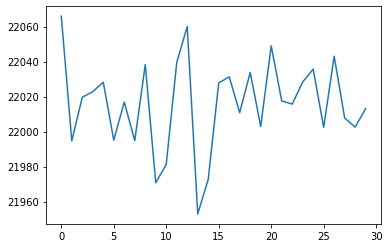

In [26]:
import matplotlib.pyplot as plt


x= [i for i in range(30)]
plt.plot(x, L)
plt.show()

From the above graph we can see the randomly chosed 30 list of Noise to form the population in California. We can see thorough the line graph it has some value closed to the reality data 39.538 million. 

In [125]:
# Rest of U.S. use the data from description
from numpy import random
ls_2 = random.normal(0.03,0.3,size=13)
#By doing the normal distribution creat the proper Noises

In [126]:
#randomly pick 13 Noises to fit per capita birth rate in the rest of U.S.
my_dict2={}
for i in range(1,14):
    my_dict2[i] = ls_2[i-1]
print(my_dict2)

{1: -0.30030588690749827, 2: 0.389858887389429, 3: -0.22418379794481, 4: 0.0438914671435385, 5: 0.23982398459212784, 6: 0.15381119193444434, 7: -0.1448760716513126, 8: 0.4101684011584884, 9: -0.30893321515939043, 10: 0.08054985030903619, 11: 0.175856473366849, 12: 0.32544910507489133, 13: 0.24168498808614633}


In [127]:
#apply the new parameter $b_2$ to the base model
I = 1
D = 0.0487697
M = -0.0073907
def P(t):
    if t == 1955:
        return 152082
    else:
        x = (t-1955)/5
        n_2= my_dict2[x]
        b2 = math.exp(-x)+n_2
        return P(t - 5) * (I + b2 - D + M)

In [27]:
list_2020 = []
for i in range(30):
    ls = random.normal(0,0.0003,size=13)
    #By doing the normal distribution creat the proper Noises
    #randomly pick 13 Noises to fit per capita birth rate in California
    my_dict={}
    for i in range(1,14):
        my_dict[i] = ls[i-1]
   # print(my_dict)
   # print()
    list_2020.append(my_dict)
    

# California use the data from description
#apply the new parameter b_2 to the base model

I = 1
D = 0.0487697
M = -0.0073907
def P(t, index):
    if t == 1955:
        return 152082
    else:
        x = (t-1955)/5
        n_2= list_2020[index][x]
        b2 = math.exp(-x)+n_2
        return P(t - 5, index) * (I + b2 - D + M)
    
L = []
for index in range(30):
    L.append(P(2020, index))
    
# print('L',L)


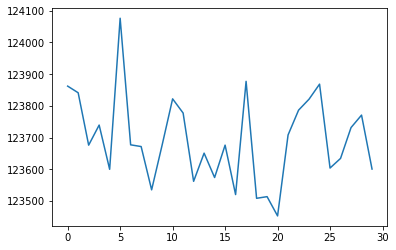

In [28]:
import matplotlib.pyplot as plt


x= [i for i in range(30)]
plt.plot(x, L)
plt.show()

From the above graph we can see the randomly chosed 30 list of Noise to form the population in the rest of U.S. We can see thorough the line graph it has some value closed to the reality data 291.911 million.

We find out that through the variation of birth rate, with the simulation to the model the result population data is closed to the reality data. 

Hence, we can prove that the stochasticity of the birth rate is crucial to the model simulation. 
In our final project, we will talk about the parameter in detail. Only changing one parameter and fixing other parameters may help us to figure out how it affects the population growth.

# Discussion and conclusions

From the simulation of our model, we find that there would be sustainable growth in the population, and if we look more deeply into the distribution of the population, the proportion of the elderly population would gradually increase, which is the ageing problem in the society. This would lead to the scarcity of labour force, and high pressure on government expenditure(demand for benefits and medical resources would be high). Thus, the intervention of the government is crucial, the government may introduce policies on attracting immigrants and encourage childbirth in order to slow down the ageing of the population, and our model provides an estimate of the distribution of the population as a reference for the government.

When our model predicts a large proportion of the elderly, and a small proportion of the first population. Then in real life we would face severe labor scarcity, leading to severe economic decline. The whole point of our model is to anticipate and prevent this from happening.

From our model, our research questions have been explored and explained. Our base model would generate a projection of population in future, and looking through the extended model, we can see a clear change in the different groups of population, and that can reflect the variation in labour force, which is a crucial component of the economy. Then, the government can intervene in it and balance the population to stabilise the economy from a macro perspective.


Due to the constraint of model complexity, all of our models proposed for this project tend to predict the population in a relatively 'perfect' world, which means our projections do not consider any possible impact of policies and regulations, as well as natural disaster such as COVID-19, all of which could result in serious variation in the death rate. This will always lead to the potential discrepancy between our prediction and real data since our assumptions about the values of parameters are based on historical trends which did not reflect extreme cases. Moreover, the United States has a long history of international migration, and immigrants make up significant parts of the workforce in America, which is not considered in our extended model for labour force prediction. Therefore, if we were to continue our research, we might add immigrants from outside of America and see the difference from our original prediction. To be more specific, if we see a significant increase in the workforce with the updated model, then we may reach the conclusion that America benefits from the labour and intelligence that immigrants bring. If there is not a large increase in the labour force with a new projection, then we need to further explore other factors that decrease the proportion of the workforce in the population.


# Reference

California, S. of. (n.d.). Facts about California's elderly. Facts About California's Elderly - Data & Reports | California Department of Aging - State of California. Retrieved March 14, 2022, from https://www.aging.ca.gov/Data_and_Reports/Facts_About_California%27s_Elderly/ 

Demographics of California. (2022, April 15). Retrieved April 21, 2022, from https://en.wikipedia.org/wiki/Demographics_of_California

Exploring recent trends in California births. (2021, August 30). Retrieved April 21, 2022, from https://lao.ca.gov/LAOEconTax/Article/Detail/691

How does population affect demand. Lisbdnet.com. (2021, November 29). Retrieved March 14, 2022, from https://lisbdnet.com/how-does-population-affect-demand/#How_Does_Population_Affect_Demand 

Mahtta, R., Fragkias, M., Güneralp, B., Mahendra, A., Reba, M., Wentz, E. A., & Seto, K. C. (2022, February 11). Urban land expansion: The role of population and economic growth for 300+ cities. Nature News. Retrieved March 14, 2022, from https://www.nature.com/articles/s42949-022-00048-y#citeas 

Total number of births. (2022, April 20). Retrieved April 21, 2022, from https://www.kff.org/other/state-indicator/number-of-births/?currentTimeframe=1&sortModel=%7B%22colId%22%3A%22Location%22%2C%22sort%22%3A%22asc%22%7D